In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)
import warnings
warnings.filterwarnings('ignore')

from here_location_services import LS
import os
from here_location_services.config.matrix_routing_config import(WorldRegion, 
                                                                MATRIX_ATTRIBUTES, 
                                                                BoundingBoxRegion, 
                                                                AutoCircleRegion,)

In [38]:
LS_API_KEY = os.environ.get("LS_API_KEY")
ls= LS(api_key=LS_API_KEY)

In [19]:
place = {"city": "Albstadt", "country": "Germany"}
G = ox.graph_from_place(place, network_type = "drive")
Gs = ox.utils_graph.get_largest_component(G, strongly = True)
gdf_nodes, gdf_edges = ox.graph_to_gdfs(Gs)
nodes_df = gdf_nodes[["y", "x"]].copy()
nodes_df.columns = ["lat", "lng"]

sample_nodes_df = nodes_df.sample(n = 191, random_state= 3)
sample_nodes_df = sample_nodes_df.sort_values(by=["osmid"])
sample_nodes_df = sample_nodes_df.drop(index = 54431056)
J = sample_nodes_df.index.values
#Nodes_S = sample_nodes_df["osmid"].tolist()
sample_nodes_df

,lat,lng
osmid,,
54431038,48.287291,9.005247
59733093,48.214724,8.962560
59733417,48.208822,9.011574
60390196,48.207599,9.022234
248189110,48.263530,9.012151
...,...,...
6440173252,48.239468,9.027664
6717766399,48.254256,9.014667
7282064855,48.208759,9.014167


In [20]:
Nodes_S = J.tolist()
Nodes_S

[54431038,
 59733093,
 59733417,
 60390196,
 248189110,
 248189146,
 248189155,
 248189224,
 248189227,
 248189310,
 249588277,
 254315162,
 254317014,
 254644053,
 254644926,
 254647079,
 254647397,
 254679329,
 255061234,
 255061416,
 255120641,
 255272973,
 255273278,
 255273357,
 255274441,
 255558685,
 255880390,
 257943765,
 257944461,
 257944572,
 257945208,
 259248633,
 259457357,
 259865133,
 259869329,
 259869330,
 259869331,
 259869370,
 259873252,
 260464605,
 260464609,
 260694777,
 262201597,
 262388403,
 263378025,
 266160974,
 266160975,
 266174155,
 266780693,
 274245997,
 279769966,
 279782607,
 279783372,
 280540869,
 280546974,
 280741075,
 280742884,
 281169837,
 282084763,
 282263645,
 282268078,
 282527822,
 283340883,
 285617366,
 286279173,
 286398603,
 286476601,
 286528263,
 286528264,
 286528335,
 286528338,
 286575506,
 286575526,
 286575529,
 286575540,
 286575567,
 286744945,
 286745287,
 286746317,
 286747213,
 286751980,
 286870886,
 286871059,
 2868711

In [ ]:
323283295, 54430983, 54431056, 54431063

In [24]:
54431063 in Nodes_S

False

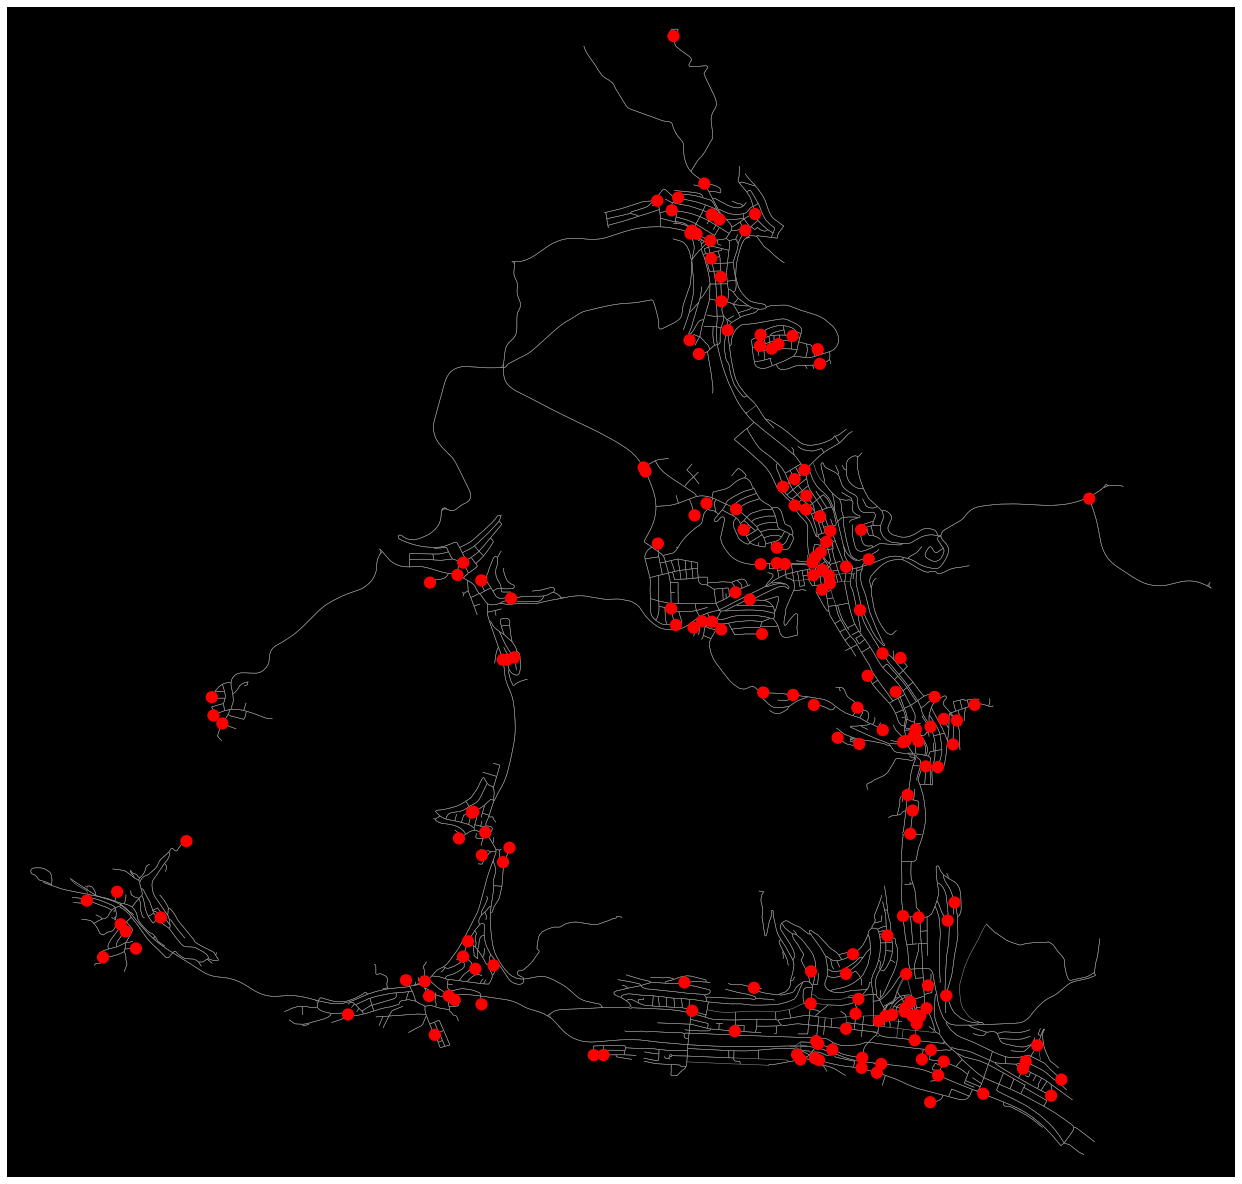

In [25]:
ns = []
for node in Gs.nodes():
    if node in Nodes_S:
        ns.append(150)
    #elif node in Nodes_S:
     #   ns.append(50)
    else:
        ns.append(0)
        
nc = []
for node in Gs.nodes():
    if node in Nodes_S: 
        nc.append("red")
    #elif node in Nodes_S:
     #   nc.append("yellow")
    else:
        nc.append("white")

        

fig, ax = ox.plot_graph(Gs, node_size = ns, edge_linewidth = 0.5, node_color = nc, figsize = (22,22), bgcolor = "black")

In [ ]:
-290847730; Coordinates: 48.2554692, 9.0136856
-366360585; Coordinates: 48.2110663, 9.022576
-293003525; Coordinates: 48.2304419, 8.9677358
-248746221; Coordinates: 48.237164, 9.027823
-262388012; Coordinates: 48.222982, 8.9184284
-255887075; Coordinates: 48.2827414, 9.001414


In [26]:
lat_DC = [48.2369097, 48.2907856, 48.246831, 48.2961436, 48.2554692,48.2110663, 48.2304419, 48.237164, 48.222982,48.2827414]
lon_DC = [9.0841059, 9.0651417, 8.9053683 , 8.9386563, 9.0136856, 9.022576, 8.9677358, 9.027823, 8.9184284, 9.001414]
osmid = [84418680, 30333819, 266217309, 9146789165, 290847730, 366360585, 293003525, 248746221, 262388012, 255887075]

dc_tuples = list(zip(osmid, lat_DC, lon_DC))
set_of_all_DC = pd.DataFrame(dc_tuples, columns = ["osmid", "lat", "lng"])
set_of_all_DC.set_index("osmid", inplace=True)
I = set_of_all_DC.index.values
set_of_all_DC

,lat,lng
osmid,,
84418680,48.236910,9.084106
30333819,48.290786,9.065142
266217309,48.246831,8.905368
9146789165,48.296144,8.938656
290847730,48.255469,9.013686
366360585,48.211066,9.022576
293003525,48.230442,8.967736
248746221,48.237164,9.027823
262388012,48.222982,8.918428


In [27]:
joined_set = pd.concat([set_of_all_DC, sample_nodes_df], sort = False)
testlol = joined_set.to_dict("records")
testlol

[{'lat': 48.2369097, 'lng': 9.0841059},
 {'lat': 48.2907856, 'lng': 9.0651417},
 {'lat': 48.246831, 'lng': 8.9053683},
 {'lat': 48.2961436, 'lng': 8.9386563},
 {'lat': 48.2554692, 'lng': 9.0136856},
 {'lat': 48.2110663, 'lng': 9.022576},
 {'lat': 48.2304419, 'lng': 8.9677358},
 {'lat': 48.237164, 'lng': 9.027823},
 {'lat': 48.222982, 'lng': 8.9184284},
 {'lat': 48.2827414, 'lng': 9.001414},
 {'lat': 48.2872911, 'lng': 9.0052474},
 {'lat': 48.2147242, 'lng': 8.9625599},
 {'lat': 48.2088224, 'lng': 9.0115736},
 {'lat': 48.2075994, 'lng': 9.0222335},
 {'lat': 48.2635302, 'lng': 9.0121508},
 {'lat': 48.2579782, 'lng': 9.0200438},
 {'lat': 48.2505289, 'lng': 9.0198888},
 {'lat': 48.212845, 'lng': 9.0271901},
 {'lat': 48.2121326, 'lng': 9.0277872},
 {'lat': 48.2101355, 'lng': 9.0445932},
 {'lat': 48.2549335, 'lng': 8.9645754},
 {'lat': 48.2089782, 'lng': 9.0201899},
 {'lat': 48.2080496, 'lng': 9.0200965},
 {'lat': 48.2096987, 'lng': 9.0297721},
 {'lat': 48.2105292, 'lng': 9.0137721},
 {'lat'

In [28]:
len(testlol)

200

In [29]:
testlol15 = testlol[0:15]
testlol30 = testlol[15:30]
testlol45 = testlol[30:45]
testlol60 = testlol[45:60]
testlol75 = testlol[60:75]
testlol90 = testlol[75:90]
testlol105 = testlol[90:105]
testlol120 = testlol[105:120]
testlol135 = testlol[120:135]
testlol150 = testlol[135:150]
testlol165 = testlol[150:165]
testlol180 = testlol[165:180]
testlol195 = testlol[180:195]
testlolfinal = testlol[195:200]

In [30]:
len(testlol150)

15

In [31]:
testlol100 = testlol[0:100]
len(testlol100)

100

In [32]:
testlol200 = testlol[100:200]
len(testlol200)

100

190

In [231]:
origins = testlolfinal
destinations = testlol200


region_definition = AutoCircleRegion()
matrix_attributes = [MATRIX_ATTRIBUTES.travelTimes]
result = ls.matrix(
origins=origins,
destinations = destinations,
region_definition=region_definition,
matrix_attributes=matrix_attributes,
async_req = True
)
result.matrix

{'numOrigins': 5,
 'numDestinations': 100,
 'travelTimes': [472,
  219,
  253,
  395,
  345,
  108,
  128,
  54,
  419,
  331,
  340,
  275,
  474,
  314,
  918,
  955,
  549,
  319,
  335,
  379,
  634,
  832,
  852,
  787,
  753,
  812,
  762,
  676,
  595,
  766,
  674,
  658,
  627,
  181,
  69,
  60,
  114,
  1083,
  484,
  539,
  425,
  711,
  491,
  594,
  555,
  762,
  511,
  586,
  549,
  608,
  186,
  611,
  550,
  101,
  158,
  165,
  121,
  159,
  216,
  1009,
  1065,
  1105,
  1106,
  1017,
  638,
  468,
  245,
  478,
  953,
  451,
  464,
  492,
  756,
  752,
  41,
  398,
  366,
  508,
  321,
  180,
  225,
  556,
  574,
  781,
  393,
  1091,
  390,
  579,
  427,
  547,
  441,
  344,
  298,
  350,
  620,
  0,
  298,
  474,
  478,
  484,
  174,
  499,
  533,
  356,
  406,
  388,
  408,
  353,
  699,
  611,
  620,
  114,
  176,
  103,
  620,
  657,
  251,
  21,
  37,
  81,
  914,
  567,
  587,
  489,
  455,
  514,
  464,
  378,
  297,
  581,
  822,
  360,
  329,
  295,
  349,

In [232]:
mylist = result.matrix["travelTimes"]
np_array = np.array(mylist)
reshaped_array = np.reshape(np_array, (5,100))
mydf = pd.DataFrame(reshaped_array)
mydf

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,472,219,253,395,345,108,128,54,419,331,...,441,344,298,350,620,0,298,474,478,484
1,174,499,533,356,406,388,408,353,699,611,...,338,46,99,630,322,354,0,754,758,186
2,803,574,608,750,700,421,441,467,443,355,...,843,746,700,264,879,468,700,0,4,765
3,799,579,613,755,705,426,446,472,448,360,...,848,751,705,269,875,473,705,5,0,761
4,111,417,390,209,259,486,506,451,797,709,...,473,226,197,728,230,452,180,794,789,0


In [233]:
nn = np.concatenate((I,J), axis = None)
nn = nn.tolist()
len(nn)

200

In [234]:
cols = nn[100:200]
ix = nn[195:200]

In [235]:
my_df1 = mydf
my_df1.columns = cols
my_df1.index = ix
my_df1.rename_axis("osmid")
my_df1

,286871301,286881715,286881804,286881925,286882005,286882134,286882135,286882168,286885523,286885539,...,4327068892,4327119895,4346413820,4448505801,6437152186,6440173252,6717766399,7282064855,7282064858,7538528632
6440173252,472,219,253,395,345,108,128,54,419,331,...,441,344,298,350,620,0,298,474,478,484
6717766399,174,499,533,356,406,388,408,353,699,611,...,338,46,99,630,322,354,0,754,758,186
7282064855,803,574,608,750,700,421,441,467,443,355,...,843,746,700,264,879,468,700,0,4,765
7282064858,799,579,613,755,705,426,446,472,448,360,...,848,751,705,269,875,473,705,5,0,761
7538528632,111,417,390,209,259,486,506,451,797,709,...,473,226,197,728,230,452,180,794,789,0


In [236]:
my_df1.to_hdf("200_200_alb.h5", mode= "w", key = "my_df1")

In [237]:
my_df1.to_csv("200_200_alb.csv")